In [12]:
import pandas as pd
df_Titanic = pd.read_csv('../../datasets/TitanicFromDisaster_test.csv')
df_Titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: >

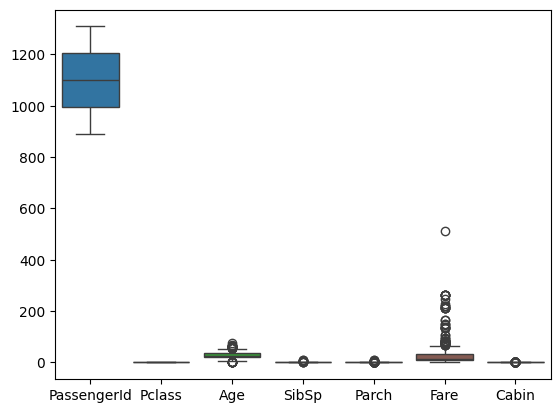

In [9]:
import seaborn as sns
import numpy as np
sns.boxplot(data=df_Titanic)

In [7]:
df_Titanic['Age'].fillna(df_Titanic['Age'].median(), inplace=True)  # Age: 중앙값으로 대체
df_Titanic['Cabin'] = df_Titanic['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)  # Cabin: 유/무로 처리
df_Titanic['Embarked'].fillna(df_Titanic['Embarked'].mode()[0], inplace=True)  # Embarked: 최빈값으로 대체


/tmp/ipykernel_22669/2628482113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Titanic['Age'].fillna(df_Titanic['Age'].median(), inplace=True)  # Age: 중앙값으로 대체
/tmp/ipykernel_22669/2628482113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

In [10]:
# Age
q1 = df_Titanic['Age'].quantile(0.25)
q3 = df_Titanic['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_Titanic['Age'] = np.where(df_Titanic['Age'] < lower_bound, df_Titanic['Age'].median(), df_Titanic['Age'])
df_Titanic['Age'] = np.where(df_Titanic['Age'] > upper_bound, df_Titanic['Age'].median(), df_Titanic['Age'])


In [11]:
# Fare
q1 = df_Titanic['Fare'].quantile(0.25)
q3 = df_Titanic['Fare'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_Titanic['Fare'] = np.where(df_Titanic['Fare'] < lower_bound, lower_bound, df_Titanic['Fare'])
df_Titanic['Fare'] = np.where(df_Titanic['Fare'] > upper_bound, upper_bound, df_Titanic['Fare'])